# **TASK - 1**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('4mg.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
def plot_histogram(image, title, method='count'):
    if len(image.shape) == 2:  # Grayscale image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    else:  # Color image
        channels = ('b', 'g', 'r')
        hist = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]

    plt.figure()
    plt.title(title)
    plt.xlabel("Gray Level")
    plt.ylabel("Pixel Count" if method == 'count' else "Probability")

    if len(image.shape) == 2:
        if method == 'probability':
            hist /= hist.sum()
        plt.plot(hist, color='black')
    else:
        colors = ('blue', 'green', 'red')
        for h, color in zip(hist, colors):
            if method == 'probability':
                h /= h.sum()
            plt.plot(h, color=color)

    plt.xlim([0, 256])
    plt.show()

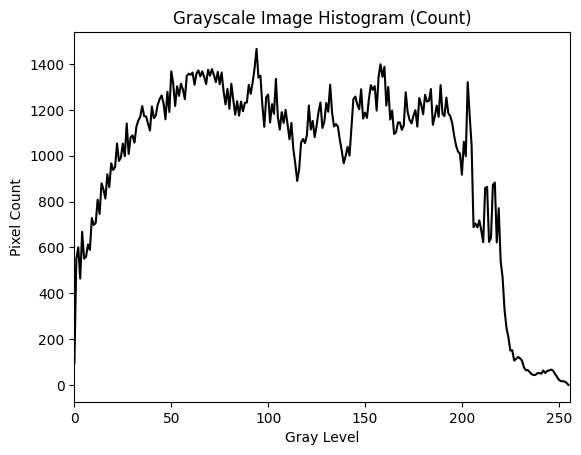

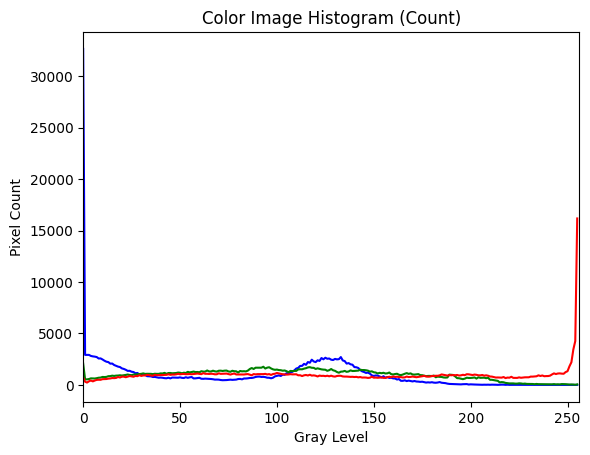

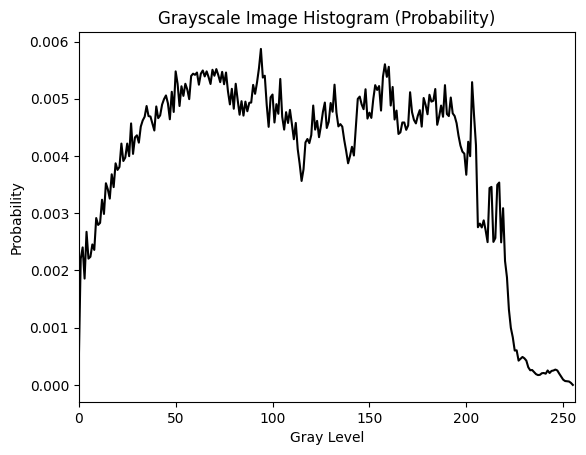

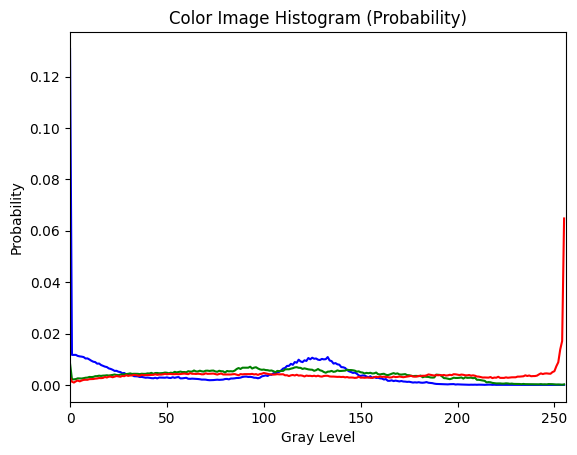

In [4]:
plot_histogram(gray_image, "Grayscale Image Histogram (Count)", method='count')
plot_histogram(image, "Color Image Histogram (Count)", method='count')
plot_histogram(gray_image, "Grayscale Image Histogram (Probability)", method='probability')
plot_histogram(image, "Color Image Histogram (Probability)", method='probability')

In [5]:
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)


In [6]:
equalized_image = cv2.equalizeHist(gray_image)

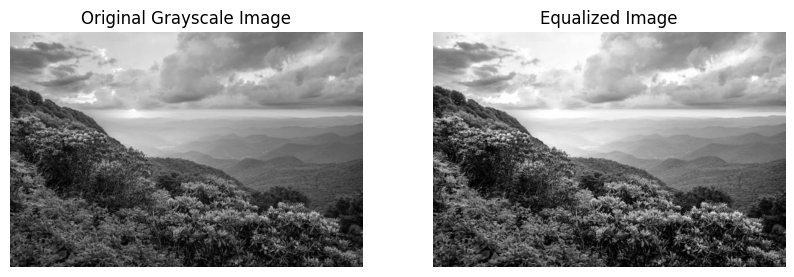

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.show()

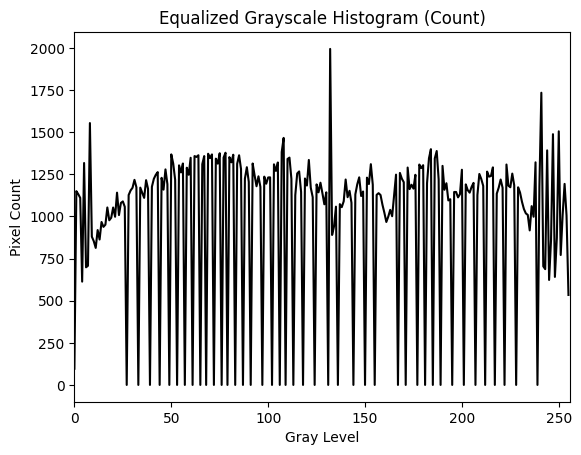

In [8]:
plot_histogram(equalized_image, "Equalized Grayscale Histogram (Count)", method='count')


# **TASK-2**

In [16]:
image = cv2.imread('4mg.jpg', cv2.IMREAD_GRAYSCALE)


In [17]:
def compute_fft(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft, dft_shift, magnitude_spectrum

In [18]:
def compute_ifft(dft_shift):
    f_ishift = np.fft.ifftshift(dft_shift)
    img_reconstructed = np.fft.ifft2(f_ishift)
    img_reconstructed = np.abs(img_reconstructed)
    return img_reconstructed


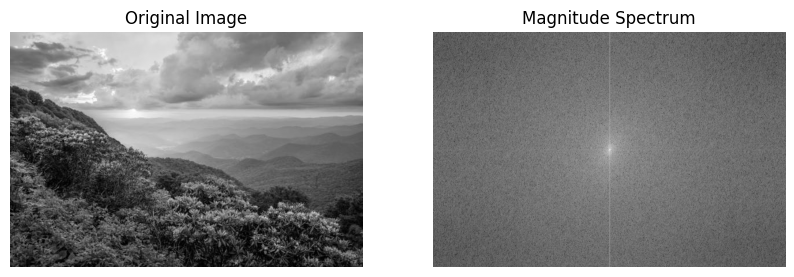

In [19]:
dft, dft_shift, magnitude_spectrum = compute_fft(image)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()

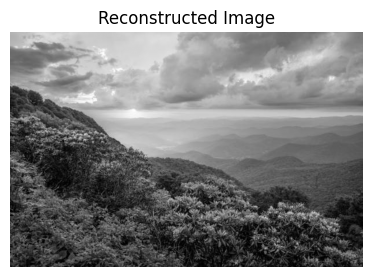

In [20]:
img_reconstructed = compute_ifft(dft_shift)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Reconstructed Image")
plt.imshow(img_reconstructed, cmap='gray')
plt.axis('off')
plt.show()

In [21]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image, M, (w, h))

In [22]:
_, rotated_dft_shift, rotated_magnitude_spectrum = compute_fft(rotated_image)


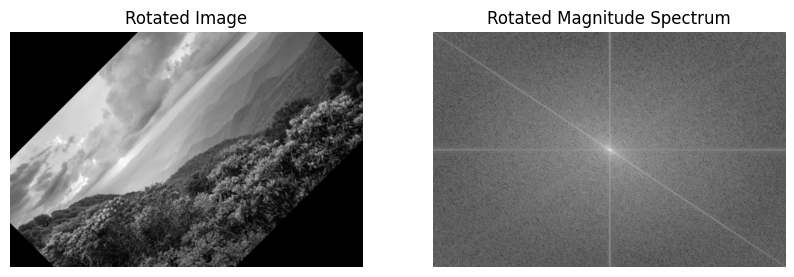

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Rotated Image")
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Rotated Magnitude Spectrum")
plt.imshow(rotated_magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()